# 70.3 Triathlon Training Analysis - Strava

Strava is a social network of endurance athletes to connect, track and share progression in their fitness. I use the application to log my activities for training analysis and personal performance. The purpose of this project was to explore my 70.3 triathlon training in a 7 month period in 2021 and 2022 with the intention of reusing the analysis applied in this notebook for future endurance events. 

I wanted to improve this year in my second attempt in the half Ironman, and the only way to do that was to keep a consistent volume of weekly training and build strength. I used an Apple Watch, Wahoo Kickr Snap, Zwift, and the Strava API to analyze all of my logged swim, outdoor and indoor bike, and run activities.

In [66]:
import config
from stravaio import strava_oauth2
from stravalib.client import Client
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

#Retrieve Client ID and API Secret from https://www.strava.com/settings/api

#strava_oauth2(client_id = config.client_id, client_secret= config.api_secret) # Hide athlete details

In [2]:
client = Client(access_token = config.access_token)

Get all workout data from a 7 month period for both the IM Michigan and Ohio 70.3 training

Reference List Athlete Activities here: https://developers.strava.com/docs/reference/#api-Activities-getLoggedInAthleteActivities

In [3]:
mi_activities = client.get_activities(after = "2021-12-01T00:00:00Z", before = "2022-06-25T00:00:00Z")
oh_activities = client.get_activities(after = "2021-01-01T00:00:00Z", before = "2021-07-24T00:00:00Z")
#list(activities) #list all activities from given time range

Reference https://developers.strava.com/docs/reference/ for available parameters in an activity/workout session

Retrieve columns of interest and place into a separate list.

In [4]:
my_cols = [
    'name', 
    'type',
    'distance',
    'moving_time',
    'elapsed_time',
    'average_speed',
    'max_speed',
    'average_heartrate',
    'max_heartrate',
    'suffer_score',
    'average_cadence', 
    'average_watts',
    'weighted_average_watts',
    'max_watts',
    'total_elevation_gain',
    'elev_high',
    'elev_low', 
    'start_date'
]

Iterate over all activities in a given year or training season and save those individual values into a separate list

In [5]:
def save_values(season, season_data):
    """
    Extract specific activity data from a given training block season and store them in a list. 
    This list will eventually be used and placed into a dataframe using the fields available from 
    'my_cols'.
    
    Parameters:
    season: Strava API object that retrieved the data in a specific timeframe 
    season_data: list to store the workout data from that season
    """
    for workout in season:
        season_dict = workout.to_dict()
        season_data.append([season_dict.get(x) for x in my_cols])

In [6]:
mi_data = []
oh_data=[]

In [7]:
save_values(mi_activities, mi_data)
save_values(oh_activities, oh_data)

Put data into separate dataframes for analysis

In [8]:
mi_df = pd.DataFrame(mi_data, columns=my_cols)
oh_df = pd.DataFrame(oh_data, columns=my_cols)

In [9]:
#return number of rows and columns
mi_df.shape

(300, 18)

In [10]:
oh_df.shape

(282, 18)

In [11]:
mi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    300 non-null    object 
 1   type                    300 non-null    object 
 2   distance                300 non-null    float64
 3   moving_time             300 non-null    int64  
 4   elapsed_time            300 non-null    int64  
 5   average_speed           300 non-null    float64
 6   max_speed               300 non-null    float64
 7   average_heartrate       287 non-null    float64
 8   max_heartrate           287 non-null    float64
 9   suffer_score            287 non-null    float64
 10  average_cadence         6 non-null      float64
 11  average_watts           95 non-null     float64
 12  weighted_average_watts  74 non-null     float64
 13  max_watts               74 non-null     float64
 14  total_elevation_gain    300 non-null    fl

In [12]:
oh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    282 non-null    object 
 1   type                    282 non-null    object 
 2   distance                282 non-null    float64
 3   moving_time             282 non-null    int64  
 4   elapsed_time            282 non-null    int64  
 5   average_speed           282 non-null    float64
 6   max_speed               282 non-null    float64
 7   average_heartrate       276 non-null    float64
 8   max_heartrate           276 non-null    float64
 9   suffer_score            276 non-null    float64
 10  average_cadence         123 non-null    float64
 11  average_watts           82 non-null     float64
 12  weighted_average_watts  59 non-null     float64
 13  max_watts               59 non-null     float64
 14  total_elevation_gain    282 non-null    fl

In [13]:
#missing MI data
total = mi_df.isnull().sum().sort_values(ascending=False)
percent = (mi_df.isnull().sum()/mi_df.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([total, percent * 100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
average_cadence,294,98.000000
max_watts,226,75.333333
weighted_average_watts,226,75.333333
average_watts,205,68.333333
elev_low,95,31.666667
elev_high,95,31.666667
suffer_score,13,4.333333
average_heartrate,13,4.333333
max_heartrate,13,4.333333
total_elevation_gain,0,0.000000


In [14]:
#missing OH data
total = oh_df.isnull().sum().sort_values(ascending=False)
percent = (oh_df.isnull().sum()/oh_df.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([total, percent * 100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
max_watts,223,79.078014
weighted_average_watts,223,79.078014
average_watts,200,70.921986
average_cadence,159,56.382979
elev_low,51,18.085106
elev_high,51,18.085106
suffer_score,6,2.127660
average_heartrate,6,2.127660
max_heartrate,6,2.127660
total_elevation_gain,0,0.000000


In [15]:
mi_df.head()

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,average_cadence,average_watts,weighted_average_watts,max_watts,total_elevation_gain,elev_high,elev_low,start_date
0,Morning Swim,Swim,1171.8,1580,1654,0.742,1.048,136.4,164.0,25.0,NaN,NaN,NaN,NaN,0.0,176.6,176.6,2022-06-23T12:57:55+00:00
1,8x 30 seconds to finish,Run,8453.1,2699,2767,3.132,6.074,155.6,180.0,50.0,NaN,NaN,NaN,NaN,16.3,203.3,194.4,2022-06-22T12:46:57+00:00
2,Morning Swim,Swim,1221.8,1798,1954,0.680,1.133,141.7,154.0,30.0,NaN,NaN,NaN,NaN,0.0,175.2,175.2,2022-06-21T12:36:14+00:00
3,Afternoon Run,Run,5166.8,1768,1773,2.922,4.860,155.0,175.0,33.0,NaN,NaN,NaN,NaN,7.6,183.4,178.5,2022-06-20T20:51:35+00:00
4,Morning Weight Training,WeightTraining,0.0,2754,2754,0.000,0.000,119.9,153.0,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2022-06-20T12:33:18+00:00


In [16]:
oh_df.head()

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,average_cadence,average_watts,weighted_average_watts,max_watts,total_elevation_gain,elev_high,elev_low,start_date
0,O-H…,Run,4058.0,1291,1433,3.143,4.2,151.8,163.0,21.0,NaN,NaN,NaN,NaN,9.4,242.2,232.7,2021-07-23T19:50:52+00:00
1,Building Run,Run,6512.9,1794,1821,3.630,5.7,164.7,177.0,50.0,NaN,NaN,NaN,NaN,7.4,183.3,178.5,2021-07-20T12:11:27+00:00
2,Morning Ride,Ride,29817.4,3888,3931,7.669,11.6,133.9,151.0,25.0,NaN,115.9,NaN,NaN,49.3,187.0,178.1,2021-07-19T12:05:03+00:00
3,Afternoon Swim,Swim,1050.0,1281,1280,0.820,5.0,145.8,157.0,27.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2021-07-18T18:15:48+00:00
4,Brick Run,Run,3430.9,923,946,3.717,6.6,168.4,179.0,29.0,NaN,NaN,NaN,NaN,4.6,183.3,178.6,2021-07-18T13:43:34+00:00


In [17]:
mi_df.shape

(300, 18)

# Data preparation and conversions

In [18]:
# A function that marks all 'Virtual Rides' as indoor
def indoor_virtual(season_df):
    """
    Add an "indoor_flag" column to a dataframe for Zwift rides.

    Parameters:
    season_df: A dataframe representing the activities from a given training block or season.

    Returns:
    None
    """
    
    last_column = len(season_df.columns)
    season_df.insert(last_column, "indoor_flag", 0, allow_duplicates = False)
    season_df.loc[(season_df['type'] == 'VirtualRide'), 'indoor_flag'] = 1
    
    last_column = last_column + 1

In [19]:
def assign_hr_zone(season_df):
    """
    Add a "heartrate_zone" column to a dataframe specifiying that specifies the average heart rate zone
    for a given workout.
    
    HR zones are ballpark estimates from personal fitness. These zones should be adjusted over time.

    Parameters:
    season_df: A dataframe representing the activities from a given training block or season.
    """
    
    
    last_column = len(season_df.columns)
    season_df.insert(last_column, "heartrate_zone", 0, allow_duplicates = False)
    
    season_df.loc[(season_df['average_heartrate'] <= 130), 'heartrate_zone'] = 1

    season_df.loc[(season_df['average_heartrate'] <= 162) & (season_df['average_heartrate'] > 130), 'heartrate_zone'] = 2

    season_df.loc[(season_df['average_heartrate'] <= 178) & (season_df['average_heartrate'] > 162), 'heartrate_zone'] = 3

    season_df.loc[(season_df['average_heartrate'] <= 194) & (season_df['average_heartrate'] > 178), 'heartrate_zone'] = 4

    season_df.loc[(season_df['average_heartrate'] > 194), 'heartrate_zone'] = 5
    last_column = last_column + 1

In [20]:
indoor_virtual(mi_df)
indoor_virtual(oh_df)

In [21]:
assign_hr_zone(mi_df)
assign_hr_zone(oh_df)

In [22]:
mi_df

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,average_cadence,average_watts,weighted_average_watts,max_watts,total_elevation_gain,elev_high,elev_low,start_date,indoor_flag,heartrate_zone
0,Morning Swim,Swim,1171.8,1580,1654,0.742,1.048,136.4,164.0,25.0,NaN,NaN,NaN,NaN,0.0,176.6,176.6,2022-06-23T12:57:55+00:00,0,2
1,8x 30 seconds to finish,Run,8453.1,2699,2767,3.132,6.074,155.6,180.0,50.0,NaN,NaN,NaN,NaN,16.3,203.3,194.4,2022-06-22T12:46:57+00:00,0,2
2,Morning Swim,Swim,1221.8,1798,1954,0.680,1.133,141.7,154.0,30.0,NaN,NaN,NaN,NaN,0.0,175.2,175.2,2022-06-21T12:36:14+00:00,0,2
3,Afternoon Run,Run,5166.8,1768,1773,2.922,4.860,155.0,175.0,33.0,NaN,NaN,NaN,NaN,7.6,183.4,178.5,2022-06-20T20:51:35+00:00,0,2
4,Morning Weight Training,WeightTraining,0.0,2754,2754,0.000,0.000,119.9,153.0,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2022-06-20T12:33:18+00:00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Morning Run,Run,20279.9,5976,6337,3.394,6.942,165.3,178.0,174.0,NaN,NaN,NaN,NaN,108.5,66.9,25.8,2021-12-04T15:18:49+00:00,0,3
296,Lunch Run,Run,6544.8,1963,2023,3.334,5.476,162.5,173.0,53.0,NaN,NaN,NaN,NaN,9.6,183.3,176.4,2021-12-02T18:00:30+00:00,0,3
297,15x 1min/1min,VirtualRide,31252.4,3611,3611,8.655,16.198,138.2,161.0,29.0,NaN,142.5,148.0,271.0,218.0,200.2,124.8,2021-12-02T13:59:16+00:00,1,2
298,Morning Run with Brady,Run,4491.5,1500,1671,2.994,5.850,141.9,160.0,12.0,NaN,NaN,NaN,NaN,7.5,183.3,178.1,2021-12-02T13:03:35+00:00,0,2


In [23]:
oh_df

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,average_cadence,average_watts,weighted_average_watts,max_watts,total_elevation_gain,elev_high,elev_low,start_date,indoor_flag,heartrate_zone
0,O-H…,Run,4058.0,1291,1433,3.143,4.2,151.8,163.0,21.0,NaN,NaN,NaN,NaN,9.4,242.2,232.7,2021-07-23T19:50:52+00:00,0,2
1,Building Run,Run,6512.9,1794,1821,3.630,5.7,164.7,177.0,50.0,NaN,NaN,NaN,NaN,7.4,183.3,178.5,2021-07-20T12:11:27+00:00,0,3
2,Morning Ride,Ride,29817.4,3888,3931,7.669,11.6,133.9,151.0,25.0,NaN,115.9,NaN,NaN,49.3,187.0,178.1,2021-07-19T12:05:03+00:00,0,2
3,Afternoon Swim,Swim,1050.0,1281,1280,0.820,5.0,145.8,157.0,27.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2021-07-18T18:15:48+00:00,0,2
4,Brick Run,Run,3430.9,923,946,3.717,6.6,168.4,179.0,29.0,NaN,NaN,NaN,NaN,4.6,183.3,178.6,2021-07-18T13:43:34+00:00,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Brick Run with Brady,Run,5336.8,1762,1961,3.029,5.6,155.7,177.0,34.0,88.9,NaN,NaN,NaN,4.7,183.3,178.5,2021-01-03T18:05:08+00:00,0,2
278,France,VirtualRide,59626.4,6350,6468,9.390,15.3,139.2,154.0,55.0,71.5,130.9,132.0,218.0,287.0,34.0,10.4,2021-01-03T15:59:26+00:00,1,2
279,Brick Run,Run,6547.4,2145,2231,3.052,4.4,159.4,171.0,49.0,88.4,NaN,NaN,NaN,7.4,183.3,178.5,2021-01-02T17:57:00+00:00,0,2
280,London,VirtualRide,48995.8,5412,5587,9.053,16.4,137.0,158.0,45.0,71.6,140.5,141.0,230.0,252.0,34.2,3.0,2021-01-02T16:14:46+00:00,1,2


# Data Conversions from metric system to U.S.

In [24]:
def convert_metric_to_us(season_df):   
    """
    Convert workouts in a dataframe from metric units to US units.
    
    Columns converted:
    - distance: meters to miles
    - average_speed: meters per second to miles per hour
    - max_speed: meters per second to miles per hour
    - total_elevation_gain: meters to feet
    - elev_high: meters to feet
    - elev_low: meters to feet
    - start_date: string to datetime

    Parameters:
    season_df: A DataFrame representing the activities from a given training block or season.   
    """

    season_df.loc[:,'distance'] = round((season_df.distance / 1609),2)
   
    season_df.loc[:,'average_speed'] = round((season_df.average_speed * 2.237),2)

    season_df.loc[:,'max_speed'] = round((season_df.max_speed * 2.237),2)

    season_df.loc[:,'total_elevation_gain'] = round((season_df.total_elevation_gain * 3.281),2)

    season_df.loc[:,'elev_high'] = round((season_df.elev_high * 3.281),2)

    season_df.loc[:,'elev_low'] = round((season_df.elev_low * 3.281),2)

    season_df['start_date'] = pd.to_datetime(season_df['start_date'])

In [25]:
convert_metric_to_us(mi_df)
convert_metric_to_us(oh_df)

# Add time columns 

I was interested in visualizing data points at a granular level of efforts at the hours, weeks, and months. May not use all fields, but nice to have.

In [26]:
def add_time_cols(season_df):
    """
    Adds time related columns to a given dataframe
    
    Columns converted:
    - minutes: the elapsed time in minutes
    - year: the year of the activity
    - month: the month of the activity
    - month_year: the year and month of the activity as a string in the format 'YYYY-MM'
    - week_no: week number of the activity
    - day_of_week: the name of the day of the week

    Parameters:
    season_df: A DataFrame representing the activities from a given training block or season. 
    """

    season_df['minutes'] = round((season_df['elapsed_time'] / 60),2)

    season_df['year'] = season_df['start_date'].dt.year

    season_df['month'] = season_df['start_date'].dt.month

    season_df['month_year'] = season_df['start_date'].apply(lambda x: x.strftime('%Y-%m'))

    season_df['week_no'] = season_df['start_date'].dt.isocalendar().week

    season_df['day_of_week'] = season_df['start_date'].dt.day_name()

In [27]:
add_time_cols(mi_df)
add_time_cols(oh_df)

In [28]:
# Indoor virtual rides qualify as a "regular" bike
mi_df = mi_df.replace(['VirtualRide'],'Ride') 
oh_df = oh_df.replace(['VirtualRide'],'Ride')

In [29]:
def workout_count(season_df):
    """
    A bar plot visual of the total count of workouts for a given training block.

    Parameters:
    season_df: A DataFrame representing the activities from a given training block or season.
    
    Returns:
    Bar plot: A bar plot showing the total count of triathlon disciplines in a training block.
    """
    type_count  = season_df['type'].value_counts()
    type_count = type_count[:4,]
    plt.figure(figsize=(10,5))
    sns.barplot(type_count.index, type_count.values, alpha=0.8)
    plt.title('Workout count by activity')
    plt.ylabel('Number of workouts', fontsize=12)
    plt.xlabel('Activity', fontsize=12)
    plt.show()

# Count of workouts by activity for IM 70.3 Benton Harbor

/Users/mattferrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


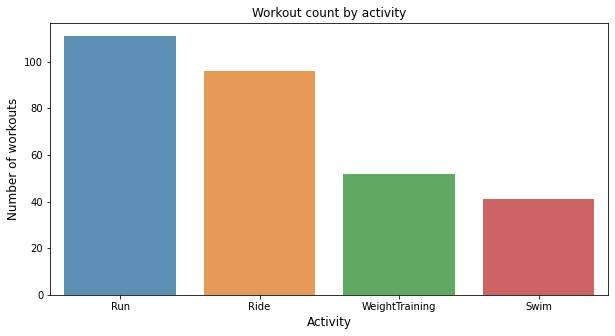

In [30]:
workout_count(mi_df)

In [31]:
#Counts of activites
mi_df.type.value_counts()

Run               111
Ride               96
WeightTraining     52
Swim               41
Name: type, dtype: int64

# Count of workouts by activity for IM 70.3 Ohio

/Users/mattferrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


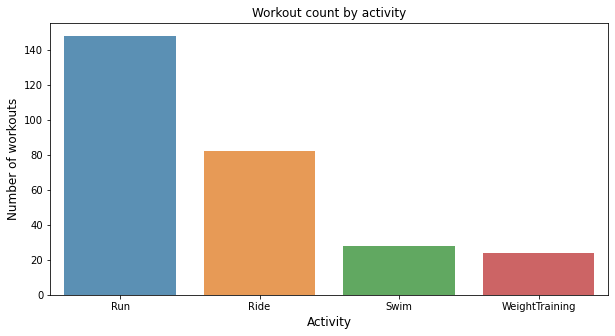

In [32]:
workout_count(oh_df)

In [33]:
#Counts of activites
oh_df.type.value_counts()

Run               148
Ride               82
Swim               28
WeightTraining     24
Name: type, dtype: int64

# Fastest swim workout training for IM 70.3 Benton Harbor

Swims were longer here in distance and duration

In [34]:
mi_swims = mi_df.loc[(mi_df['type'] == 'Swim')]

mi_swims_df = mi_swims.sort_values(by = 'average_speed', ascending = False) 

mi_swims_df.head(10)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,minutes,year,month,month_year,week_no,day_of_week
26,Morning Swim,Swim,0.96,1827,1826,1.90,11.18,143.6,159.0,39.0,...,NaN,2022-06-09 12:35:59+00:00,0,2,30.43,2022,6,2022-06,23,Thursday
40,Afternoon Swim,Swim,0.96,1836,1835,1.89,11.18,142.5,158.0,40.0,...,NaN,2022-06-01 18:17:03+00:00,0,2,30.58,2022,6,2022-06,22,Wednesday
108,Lunch Swim,Swim,0.99,1910,1909,1.87,11.18,156.0,167.0,55.0,...,NaN,2022-04-27 17:47:22+00:00,0,2,31.82,2022,4,2022-04,17,Wednesday
43,Afternoon Swim,Swim,0.96,1856,1856,1.87,11.18,145.9,160.0,44.0,...,NaN,2022-05-30 18:41:22+00:00,0,2,30.93,2022,5,2022-05,22,Monday
71,Lunch Swim,Swim,0.81,1573,1573,1.85,11.18,145.1,156.0,31.0,...,NaN,2022-05-14 17:51:59+00:00,0,2,26.22,2022,5,2022-05,19,Saturday
13,Morning Swim,Swim,0.95,1869,1868,1.83,11.18,143.8,161.0,36.0,...,NaN,2022-06-15 12:20:13+00:00,0,2,31.13,2022,6,2022-06,24,Wednesday
131,Morning Swim,Swim,0.93,1848,1848,1.82,11.18,156.8,170.0,59.0,...,NaN,2022-04-17 14:19:10+00:00,0,2,30.80,2022,4,2022-04,15,Sunday
113,Afternoon Swim,Swim,0.78,1534,1532,1.82,11.18,152.3,165.0,41.0,...,NaN,2022-04-24 20:12:03+00:00,0,2,25.53,2022,4,2022-04,16,Sunday
68,Morning Swim,Swim,0.93,1843,1843,1.82,11.18,136.9,159.0,33.0,...,NaN,2022-05-17 12:32:33+00:00,0,2,30.72,2022,5,2022-05,20,Tuesday
96,Morning Swim,Swim,1.03,2045,2045,1.81,11.18,151.3,160.0,54.0,...,NaN,2022-05-03 15:53:23+00:00,0,2,34.08,2022,5,2022-05,18,Tuesday


# Fastest swim workout training for IM 70.3 Ohio

In [35]:
oh_swims = oh_df.loc[(oh_df['type'] == 'Swim')]

oh_swims_df = oh_swims.sort_values(by = 'average_speed', ascending = False) 

oh_swims_df.head(10)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,minutes,year,month,month_year,week_no,day_of_week
20,Lunch Swim,Swim,0.78,1455,1454,1.92,11.18,152.4,164.0,39.0,...,NaN,2021-07-09 16:15:59+00:00,0,2,24.23,2021,7,2021-07,27,Friday
151,Afternoon Swim,Swim,0.70,1321,1298,1.91,11.18,148.6,168.0,35.0,...,NaN,2021-05-05 21:33:42+00:00,0,2,21.63,2021,5,2021-05,18,Wednesday
57,Morning Swim,Swim,0.96,1834,1833,1.89,11.18,147.6,158.0,42.0,...,NaN,2021-06-25 12:16:51+00:00,0,2,30.55,2021,6,2021-06,25,Friday
28,Morning Swim,Swim,0.78,1486,1465,1.88,11.18,152.7,165.0,39.0,...,NaN,2021-07-06 12:29:14+00:00,0,2,24.42,2021,7,2021-07,27,Tuesday
171,Morning Swim,Swim,0.65,1248,1250,1.88,11.18,156.9,172.0,39.0,...,NaN,2021-04-25 12:47:22+00:00,0,2,20.83,2021,4,2021-04,16,Sunday
75,Afternoon Swim,Swim,0.62,1188,1187,1.88,11.18,145.9,157.0,27.0,...,NaN,2021-06-17 21:12:33+00:00,0,2,19.78,2021,6,2021-06,24,Thursday
100,10x 25 fast + 100 cruise,Swim,0.78,1499,1498,1.87,11.18,151.1,170.0,42.0,...,NaN,2021-06-04 22:57:22+00:00,0,2,24.97,2021,6,2021-06,22,Friday
185,Morning Swim,Swim,0.65,1255,1256,1.87,11.18,155.2,175.0,39.0,...,NaN,2021-04-18 13:07:30+00:00,0,2,20.93,2021,4,2021-04,15,Sunday
47,Morning Swim,Swim,0.19,360,359,1.86,11.18,150.9,161.0,9.0,...,NaN,2021-06-28 11:56:01+00:00,0,2,5.98,2021,6,2021-06,26,Monday
134,Morning Swim,Swim,0.93,1812,1778,1.85,11.18,154.0,170.0,55.0,...,NaN,2021-05-19 11:42:30+00:00,0,2,29.63,2021,5,2021-05,20,Wednesday


# Fastest outdoor bike workout training for IM 70.3 Benton Harbor

Only view rides done outdoors. Factor in slowing down for red lights for average speed. Race situation, average speed would (hopefully) be higher.

In [36]:
mi_rides = mi_df.loc[(mi_df['type'] == 'Ride') & mi_df['indoor_flag'] == 0]

ride_mi_df = mi_rides.sort_values(by = 'average_speed', ascending = False) 

ride_mi_df.head(10)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,minutes,year,month,month_year,week_no,day_of_week
286,15x 1min/1min,Ride,19.10,3600,3600,19.10,0.00,NaN,NaN,NaN,...,NaN,2021-12-12 18:24:00+00:00,0,0,60.00,2021,12,2021-12,49,Sunday
159,Lunch Ride,Ride,26.55,5179,5312,18.45,26.54,150.2,175.0,84.0,...,584.02,2022-03-21 16:14:03+00:00,0,2,88.53,2022,3,2022-03,12,Monday
48,Tower this is Ghost Rider requesting a flyby,Ride,22.80,4510,4647,18.19,30.46,145.3,171.0,57.0,...,584.02,2022-05-28 13:27:43+00:00,0,2,77.45,2022,5,2022-05,21,Saturday
54,Lunch Ride,Ride,20.91,4147,4147,18.14,29.56,145.8,166.0,54.0,...,583.03,2022-05-24 17:04:48+00:00,0,2,69.12,2022,5,2022-05,21,Tuesday
24,Afternoon Ride,Ride,24.29,4826,4826,18.12,28.47,148.4,166.0,76.0,...,584.02,2022-06-09 19:57:04+00:00,0,2,80.43,2022,6,2022-06,23,Thursday
79,Morning Ride,Ride,22.18,4487,4487,17.79,26.12,153.3,169.0,88.0,...,584.02,2022-05-10 15:18:22+00:00,0,2,74.78,2022,5,2022-05,19,Tuesday
121,Afternoon Ride,Ride,22.23,4578,4578,17.48,27.58,149.0,169.0,74.0,...,584.02,2022-04-21 20:05:38+00:00,0,2,76.30,2022,4,2022-04,16,Thursday
70,Morning Ride,Ride,35.26,7279,7279,17.44,26.12,135.9,154.0,49.0,...,584.02,2022-05-15 13:21:29+00:00,0,2,121.32,2022,5,2022-05,19,Sunday
162,Afternoon Ride,Ride,20.74,4323,4323,17.27,31.02,153.4,176.0,87.0,...,584.02,2022-03-16 20:23:50+00:00,0,2,72.05,2022,3,2022-03,11,Wednesday
7,Morning Ride,Ride,20.71,4317,4363,17.27,28.38,141.4,158.0,42.0,...,584.02,2022-06-18 13:06:18+00:00,0,2,72.72,2022,6,2022-06,24,Saturday


# Fastest outdoor bike workout training for IM 70.3 Ohio

In [37]:
oh_rides = oh_df.loc[(oh_df['type'] == 'Ride') & oh_df['indoor_flag'] == 0]

ride_oh_df = oh_rides.sort_values(by = 'average_speed', ascending = False) 

ride_oh_df.head(10)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,minutes,year,month,month_year,week_no,day_of_week
11,Morning Ride,Ride,26.21,4954,4954,19.05,31.77,152.3,166.0,90.0,...,596.81,2021-07-13 14:40:08+00:00,0,2,82.57,2021,7,2021-07,28,Tuesday
5,Morning Ride,Ride,39.95,7735,7821,18.59,30.20,NaN,NaN,NaN,...,585.33,2021-07-18 11:23:37+00:00,0,0,130.35,2021,7,2021-07,28,Sunday
31,Morning Ride,Ride,34.08,6689,6722,18.34,31.54,154.3,167.0,137.0,...,596.81,2021-07-04 13:42:29+00:00,0,2,112.03,2021,7,2021-07,26,Sunday
16,Morning Ride,Ride,27.20,5360,5360,18.26,31.54,155.6,169.0,117.0,...,588.61,2021-07-11 14:00:20+00:00,0,2,89.33,2021,7,2021-07,27,Sunday
24,Lunch Ride,Ride,20.13,4058,4058,17.85,26.40,142.2,156.0,38.0,...,596.81,2021-07-07 15:46:12+00:00,0,2,67.63,2021,7,2021-07,27,Wednesday
133,Morning Ride,Ride,20.08,4122,4192,17.53,27.07,154.6,171.0,87.0,...,584.35,2021-05-20 12:46:50+00:00,0,2,69.87,2021,5,2021-05,20,Thursday
29,Morning Ride,Ride,40.31,8283,8310,17.52,32.21,146.0,171.0,101.0,...,596.81,2021-07-05 12:59:38+00:00,0,2,138.50,2021,7,2021-07,27,Monday
35,Morning Ride,Ride,26.75,5527,5566,17.42,29.53,148.2,171.0,85.0,...,584.35,2021-07-02 13:17:50+00:00,0,2,92.77,2021,7,2021-07,26,Friday
2,Morning Ride,Ride,18.53,3888,3931,17.16,25.95,133.9,151.0,25.0,...,584.35,2021-07-19 12:05:03+00:00,0,2,65.52,2021,7,2021-07,29,Monday
99,Morning Ride,Ride,29.72,6273,6354,17.05,25.50,142.2,160.0,63.0,...,584.35,2021-06-05 11:22:55+00:00,0,2,105.90,2021,6,2021-06,22,Saturday


# Fastest run training for IM 70.3 Benton Harbor

Longer more quality runs in training. Didn't separate warm up and cool down runs this block. 

In [38]:
mi_runs = mi_df.loc[(mi_df['type'] == 'Run')]

run_mi_df = mi_runs.sort_values(by = 'average_speed', ascending = False) 

run_mi_df.head(10)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,minutes,year,month,month_year,week_no,day_of_week
222,2022 F3 Half,Run,13.21,5727,5727,8.30,11.61,176.4,188.0,255.0,...,579.75,2022-01-29 16:00:38+00:00,0,3,95.45,2022,1,2022-01,4,Saturday
28,15x 1min/1min,Run,6.26,2820,3020,8.00,12.64,164.3,182.0,77.0,...,583.36,2022-06-07 18:53:28+00:00,0,3,50.33,2022,6,2022-06,23,Tuesday
181,Lunch Run with Brady,Run,1.09,491,694,8.00,11.43,154.9,169.0,9.0,...,597.80,2022-03-02 18:39:16+00:00,0,2,11.57,2022,3,2022-03,9,Wednesday
41,5x 3min/2min,Run,5.77,2628,3225,7.91,12.69,168.1,194.0,87.0,...,583.36,2022-05-31 20:42:01+00:00,0,3,53.75,2022,5,2022-05,22,Tuesday
290,5x 2:00/3:00,Run,7.74,3557,3578,7.83,11.18,167.7,186.0,116.0,...,583.36,2021-12-10 13:32:20+00:00,0,3,59.63,2021,12,2021-12,49,Friday
158,8x 200/200,Run,7.22,3319,3351,7.83,13.45,165.6,191.0,103.0,...,583.36,2022-03-22 18:44:27+00:00,0,3,55.85,2022,3,2022-03,12,Tuesday
34,Comfy steady,Run,7.03,3249,3257,7.79,12.43,162.1,174.0,88.0,...,583.03,2022-06-04 15:32:18+00:00,0,3,54.28,2022,6,2022-06,22,Saturday
153,Lunch Run,Run,7.04,3304,3330,7.68,11.53,166.8,182.0,105.0,...,583.36,2022-03-27 16:50:00+00:00,0,3,55.50,2022,3,2022-03,12,Sunday
20,2x 2mi Tempo,Run,9.91,4650,5155,7.67,11.80,162.1,182.0,121.0,...,583.03,2022-06-11 14:53:38+00:00,0,3,85.92,2022,6,2022-06,23,Saturday
109,Lunch Run,Run,0.48,225,238,7.67,10.21,161.9,165.0,6.0,...,592.88,2022-04-27 17:35:44+00:00,0,2,3.97,2022,4,2022-04,17,Wednesday


# Fastest run training for IM 70.3 Ohio

No fast runs greater than 5mi. Must have included more separate warm up and cool down activities but also didn't seem to spend too much time on my feet when I wanted to pick up the pace.

In [39]:
oh_runs = oh_df.loc[(oh_df['type'] == 'Run')]

run_oh_df = oh_runs.sort_values(by = 'average_speed', ascending = False) 

run_oh_df.head(10)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,minutes,year,month,month_year,week_no,day_of_week
22,20 minute Tempo Run,Run,2.93,1202,1202,8.78,11.18,181.1,205.0,63.0,...,634.22,2021-07-08 15:10:58+00:00,0,4,20.03,2021,7,2021-07,27,Thursday
124,20 minute Tempo,Run,2.81,1203,1203,8.40,10.07,178.9,189.0,59.0,...,584.67,2021-05-25 12:32:56+00:00,0,4,20.05,2021,5,2021-05,21,Tuesday
30,Brick Run at 70.3 race pace,Run,2.15,925,930,8.35,11.41,168.4,182.0,31.0,...,616.50,2021-07-04 15:44:59+00:00,0,3,15.50,2021,7,2021-07,26,Sunday
4,Brick Run,Run,2.13,923,946,8.31,14.76,168.4,179.0,29.0,...,585.99,2021-07-18 13:43:34+00:00,0,3,15.77,2021,7,2021-07,28,Sunday
17,Morning Run,Run,0.60,266,358,8.15,11.18,158.4,173.0,5.0,...,585.66,2021-07-10 12:43:10+00:00,0,2,5.97,2021,7,2021-07,27,Saturday
1,Building Run,Run,4.05,1794,1821,8.12,12.75,164.7,177.0,50.0,...,585.66,2021-07-20 12:11:27+00:00,0,3,30.35,2021,7,2021-07,29,Tuesday
92,25 minute Tempo,Run,3.35,1504,1504,8.01,8.95,180.2,191.0,77.0,...,582.71,2021-06-08 16:38:45+00:00,0,4,25.07,2021,6,2021-06,23,Tuesday
15,Brick Run,Run,3.18,1430,1448,7.99,12.30,165.1,175.0,40.0,...,628.31,2021-07-11 15:36:51+00:00,0,3,24.13,2021,7,2021-07,27,Sunday
108,30 minutes Steady,Run,4.02,1810,1837,7.99,11.63,168.9,188.0,64.0,...,582.71,2021-06-01 16:34:39+00:00,0,3,30.62,2021,6,2021-06,22,Tuesday
82,"6x 400m @5k effort, 400m recovery",Run,2.98,1359,1359,7.90,11.18,171.4,187.0,51.0,...,582.71,2021-06-15 11:05:05+00:00,0,3,22.65,2021,6,2021-06,24,Tuesday


# Longest activities in miles: IM 70.3 Benton Harbor

In [40]:
# longest activities of the year in miles
mi_df.groupby('type')['distance'].nlargest(1)

type               
Ride            221    46.70
Run             222    13.21
Swim            27      1.37
WeightTraining  4       0.00
Name: distance, dtype: float64

# Longest activities in miles: IM 70.3 Ohio

In [41]:
# longest activities of the year in miles
oh_df.groupby('type')['distance'].nlargest(1)

type              
Ride            29    40.31
Run             18    10.04
Swim            57     0.96
WeightTraining  12     0.00
Name: distance, dtype: float64

In [42]:
mi_weights = mi_df.loc[(mi_df['type'] == 'WeightTraining')]
oh_weights = oh_df.loc[(oh_df['type'] == 'WeightTraining')]

In [43]:
def print_hours_by_activity(swim, bike, run, strength):
    """
    Print the total hours for each triathlon discipline in a training block.

    Parameters:
    swim: dataframe representing all swim activities from a specific season/year.
    bike: dataframe representing all bike activities from a specific season/year. 
    run: dataframe representing all run activities from a specific season/year.
    strength: dataframe representing all strength activities from a specific season/year.
    
    """
    print (f'Total hours swimming: ' + str(swim['minutes'].sum()/60))
    print (f'Total hours cycling: ' + str(bike['minutes'].sum()/60))
    print (f'Total hours running: ' + str(run['minutes'].sum()/60))
    print (f'Total hours strength training: ' + str(strength['minutes'].sum()/60))

# Hours by activity training for IM 70.3 Benton Harbor

In [44]:
print_hours_by_activity(mi_swims, mi_rides, mi_runs, mi_weights)

Total hours swimming: 23.3275
Total hours cycling: 173.31266666666667
Total hours running: 83.62966666666668
Total hours strength training: 35.00533333333333


# Hours by activity training for IM 70.3 Ohio

In [45]:
print_hours_by_activity(oh_swims, oh_rides, oh_runs, oh_weights)

Total hours swimming: 11.907833333333334
Total hours cycling: 135.93316666666666
Total hours running: 81.5835
Total hours strength training: 14.069166666666668


# Distance in Miles by Activity - Benton Harbor and Ohio

In [46]:
def print_distance_in_miles(race, swim, bike, run):
    """
    Print the total distance in miles for each triathlon discipline in a training block.

    Parameters:
    swim: dataframe representing all swim activities from a specific season/year.
    bike: dataframe representing all bike activities from a specific season/year. 
    run: dataframe representing all run activities from a specific season/year.
    
    """
    print(f'{race} swim miles: ' +str(swim['distance'].sum()))
    print(f'{race} bike miles: ' +str(bike['distance'].sum()))
    print(f'{race} run miles: ' +str(run['distance'].sum()))

In [47]:
print_distance_in_miles('Benton Harbor', mi_swims, mi_rides, mi_runs)

Benton Harbor swim miles: 40.95
Benton Harbor bike miles: 1171.26
Benton Harbor run miles: 593.6300000000001


In [48]:
print_distance_in_miles('Ohio', oh_swims, oh_rides, oh_runs)

Ohio swim miles: 21.709999999999994
Ohio bike miles: 1029.26
Ohio run miles: 531.6899999999999


In [49]:
#Describe average heartrate by activity type
mi_df.groupby('type')[['average_heartrate']].describe()

average_heartrate                                         \
                           count        mean        std    min      25%   
type                                                                      
Ride                        86.0  138.190698   7.817125  120.1  131.550   
Run                        108.0  158.738889   7.621500  138.2  154.975   
Swim                        41.0  146.204878   5.588021  136.4  142.300   
WeightTraining              52.0  114.148077  10.475939   88.6  108.275   

                                        
                   50%      75%    max  
type                                    
Ride            138.15  143.650  157.2  
Run             159.75  163.800  176.4  
Swim            144.90  150.300  158.1  
WeightTraining  116.10  120.325  132.1

In [50]:
#Describe average heartrate by activity type
oh_df.groupby('type')[['average_heartrate']].describe()

average_heartrate                                         \
                           count        mean        std    min      25%   
type                                                                      
Ride                        76.0  133.421053  10.780072  105.2  127.625   
Run                        148.0  155.096622  10.874000  122.9  148.675   
Swim                        28.0  148.410714   5.951367  133.1  145.725   
WeightTraining              24.0  119.183333   7.097805  105.9  114.100   

                                       
                   50%     75%    max  
type                                   
Ride            133.30  142.05  155.6  
Run             155.55  162.95  181.1  
Swim            148.65  151.65  160.3  
WeightTraining  119.10  123.10  138.8

In [51]:
# Describe max heartrate by activity type
mi_df.groupby('type')[['max_heartrate']].describe()

max_heartrate                                              \
                       count        mean       std    min     25%    50%   
type                                                                       
Ride                    86.0  158.093023  9.201826  137.0  151.25  159.0   
Run                    108.0  173.175926  8.283334  149.0  168.75  173.5   
Swim                    41.0  162.463415  5.495896  154.0  158.00  162.0   
WeightTraining          52.0  150.211538  9.280670  122.0  146.00  151.0   

                              
                  75%    max  
type                          
Ride            166.0  176.0  
Run             179.0  194.0  
Swim            166.0  174.0  
WeightTraining  157.0  166.0

In [52]:
# Describe average heartrate by activity type
oh_df.groupby('type')[['max_heartrate']].describe()

max_heartrate                                               \
                       count        mean        std    min     25%    50%   
type                                                                        
Ride                    76.0  153.657895  13.883854  116.0  145.75  154.0   
Run                    148.0  171.702703  10.959083  142.0  164.00  172.0   
Swim                    28.0  164.357143   7.072190  151.0  158.75  164.0   
WeightTraining          24.0  153.125000   7.072989  137.0  150.75  152.5   

                              
                  75%    max  
type                          
Ride            160.0  203.0  
Run             180.0  205.0  
Swim            170.0  178.0  
WeightTraining  158.0  166.0

# Benton Harbor Training Histogram
Had more efforts on the higher end of my relative aerobic capacity between 140bpm and 170bpm in comparison to training for Ohio where the majority of my training was on the lower end of my aerobic capacity. Based quite a bit of my training on effort and felt pretty good for the most part.

In [53]:
alt.Chart(mi_df).mark_bar().encode(
alt.X("average_heartrate:Q",bin=alt.Bin(step=10)),
y=alt.Y('count(activity_id):Q', axis=alt.Axis(title='# of activities'))).properties(
width=500,
title='Average Heartrate Histogram')

alt.Chart(...)

# Ohio Training Histogram

In [54]:
alt.Chart(oh_df).mark_bar().encode(
    alt.X("average_heartrate:Q",bin=alt.Bin(step=10)),
    y=alt.Y('count(activity_id):Q', axis=alt.Axis(title='# of activities'))).properties(
    width=500,
    title='Average Heartrate Histogram')

alt.Chart(...)

# Time spent in heart rate zone
Treadmill runs and swims account for the '0' heartrate zones

In [55]:
mi_df.groupby(['heartrate_zone'])['minutes'].sum() / 60

heartrate_zone
0     14.714000
1     45.033667
2    165.294000
3     36.229500
Name: minutes, dtype: float64

In [56]:
oh_df.groupby(['heartrate_zone'])['minutes'].sum() / 60

heartrate_zone
0      6.780333
1     35.682833
2    129.619333
3     21.679167
4      1.085833
Name: minutes, dtype: float64

# Benton Harbor barplot by zone
Interesting to see no efforts were in Zone 4.

<ipython-input-57-3fd57bd9b430>:30: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(hrz, values, color ='ygbrr',


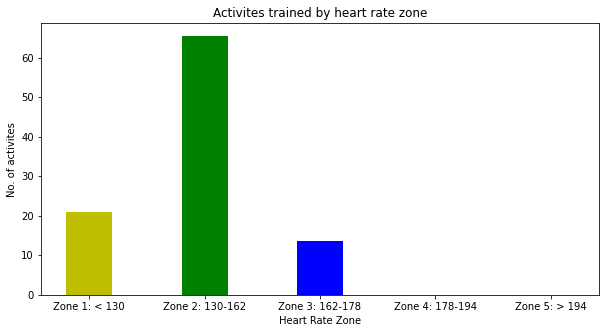

In [57]:
# Prepare the heartrate data for barplot
counts = [0, 0, 0, 0, 0]
 
hrdata = mi_df['average_heartrate']
for point in hrdata:
        if (point <= 130):
            counts[0] += 1
        elif (point > 130 and point <= 162):
            counts[1] += 1
        elif (point > 162 and point <= 178):
            counts[2] += 1
        elif (point > 178 and point <= 194):
            counts[3] += 1
        elif (point > 194):
            counts[4] += 1
tmp = counts
total = sum(tmp)
counts = [(1. * x / total) * 100 for x in tmp]

# creating the dataset 
data = {'Zone 1: < 130':counts[0], 'Zone 2: 130-162':counts[1], 'Zone 3: 162-178':counts[2],  
        'Zone 4: 178-194':counts[3], 'Zone 5: > 194': counts[4]} 
    
hrz = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(hrz, values, color ='ygbrr',  
        width = 0.4) 
  
plt.xlabel("Heart Rate Zone") 
plt.ylabel("No. of activites") 
plt.title("Activites trained by heart rate zone") 
plt.show() 

# Ohio barplot by zone

<ipython-input-58-e70bfd4abd02>:30: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(hrz, values, color ='ygbrr',


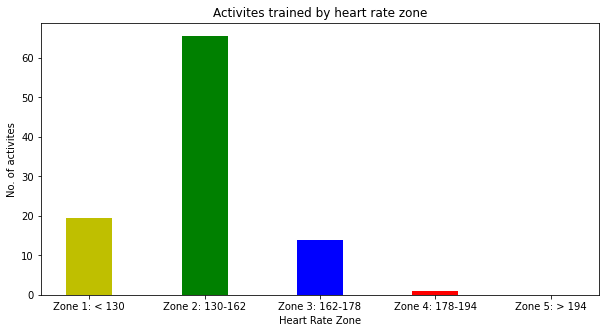

In [58]:
# Prepare the heartrate data for barplot
counts = [0, 0, 0, 0, 0]
 
hrdata = oh_df['average_heartrate']
for point in hrdata:
        if (point <= 130):
            counts[0] += 1
        elif (point > 130 and point <= 162):
            counts[1] += 1
        elif (point > 162 and point <= 178):
            counts[2] += 1
        elif (point > 178 and point <= 194):
            counts[3] += 1
        elif (point > 194):
            counts[4] += 1
tmp = counts
total = sum(tmp)
counts = [(1. * x / total) * 100 for x in tmp]

# creating the dataset 
data = {'Zone 1: < 130':counts[0], 'Zone 2: 130-162':counts[1], 'Zone 3: 162-178':counts[2],  
        'Zone 4: 178-194':counts[3], 'Zone 5: > 194': counts[4]} 
    
hrz = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(hrz, values, color ='ygbrr',  
        width = 0.4) 
  
plt.xlabel("Heart Rate Zone") 
plt.ylabel("No. of activites") 
plt.title("Activites trained by heart rate zone") 
plt.show() 

# Heartrate Intensity
Strava's 'Relative Effort' is an analysis of heart rate data and intensity.
***The suffer score metric is only available to Premium Strava subscribers.***

In [59]:
#https://alancouzens.com/blog/optimal_periodization.html
# average suffer score from the 7 month blocks
print(f'MI suffer score: ' +str(round((mi_df['suffer_score'].mean()),2)))
print(f'OH suffer score: ' +str(round((oh_df['suffer_score'].mean()),2)))

MI suffer score: 45.33
OH suffer score: 35.13


Had quite a bit more intensity early in the base phase on the bike. Pretty hard to maintain intensity for that long as some of the Winter boredom of being indoors sets in around February for me. The heat was a factor that affected my heartrate once the Summer temperatures started to hit in June.

In [60]:
bar = alt.Chart(mi_df).mark_bar(size=30).encode(
    x=alt.X('month', axis=alt.Axis(title='Month')),
    y='mean(suffer_score)',
    color='mean(suffer_score):Q'
)

rule = alt.Chart(mi_df).mark_rule(color='red').encode(
    y='mean(suffer_score):Q'
)

(bar + rule).properties(
    width=500,
    title='Intensity Average'
)

alt.LayerChart(...)

In [61]:
# average intensity each month
round((mi_df.groupby(['month'])['suffer_score'].mean()),2)

month
1     51.23
2     34.67
3     46.37
4     39.08
5     39.84
6     43.73
12    66.43
Name: suffer_score, dtype: float64

In [62]:
bar = alt.Chart(oh_df).mark_bar(size=30).encode(
    x=alt.X('month', axis=alt.Axis(title='Month')),
    y='mean(suffer_score)',
    color='mean(suffer_score):Q'
)

rule = alt.Chart(oh_df).mark_rule(color='red').encode(
    y='mean(suffer_score):Q'
)

(bar + rule).properties(
    width=500,
    title='Intensity Average'
)

alt.LayerChart(...)

In [63]:
round((oh_df.groupby(['month'])['suffer_score'].mean()),2)

month
1    43.60
2    36.17
3    42.13
4    30.71
5    31.00
6    29.59
7    41.68
Name: suffer_score, dtype: float64

# Benton Harbor Build: Average heartrate and speed (mph)

Running into where I felt comfortable at my upper aerobic capacity. Turning it up a notch at ~ 8mph vs last year where it was just over 6mph. Consistent bike ride efforts. 

In [64]:
brush = alt.selection_interval()

points = alt.Chart(mi_df).mark_point().encode(
    x='average_speed:Q',
    y='average_heartrate:Q',
    color=alt.condition(brush, 'type:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(mi_df).mark_bar().encode(
    y='type:N',
    color='type:N',
    x='count(type):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

# Ohio Build: Average heartrate and speed (mph)

Bike ride efforts were all over the place during the build. Not nearly as consistent.

In [65]:
brush = alt.selection_interval()

points = alt.Chart(oh_df).mark_point().encode(
    x='average_speed:Q',
    y='average_heartrate:Q',
    color=alt.condition(brush, 'type:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(oh_df).mark_bar().encode(
    y='type:N',
    color='type:N',
    x='count(type):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

Takeaways from training: 
- I trained with a purpose in 2022 with the goal to set a PR.
- I incorporated strength training to improve upper and lower extremity strength, endurance, 
and reduce the risk of injury.
- I definitely felt more of a durable to take on more intense sessions as I ramped up the volume.
- I also noticed that I was less sore on days that I really got after it.
- If I didn't spend time strength training, my body would have become very frail and probably would have gotten injured.
- Spent nearly double the amount of time in the water compared to 2021 IM 70.3 Ohio training. 
- Spent more time in the saddle with higher quality Zwift workouts in the Winter.
- Ran less times, but seemed to have run a tad more GPS miles meaning my runs were probably longer in duration. 
- Had quite a few open water swims leading up to the race and felt so much more comfortable compared to last year.


Improve:
- Continue to strength train and don't be afraid to throw heavy weight around
- Need to get more miles in training for the run on tired legs OTB or after strength sessions
- PICK UP THE SPEED IN TRANSITIONS!
- Threshold Zone workout examples for 2023:
    - 3x 5:00 @ Threshold, 2:00 jog
    - 1hr E, 3x 2mi @ Threshold, 2mi E